In [7]:
import numpy as np
import matplotlib.pyplot as plt
import Pk_library as PKL
import os
import analysis
import h5py as h5

0.5180117870420108 -1.951563910473908e-18

Computing power spectrum of the field...
Time to complete loop = 0.00
Time taken = 0.00 seconds


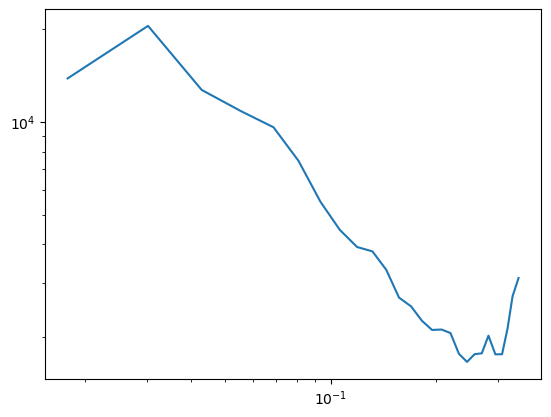

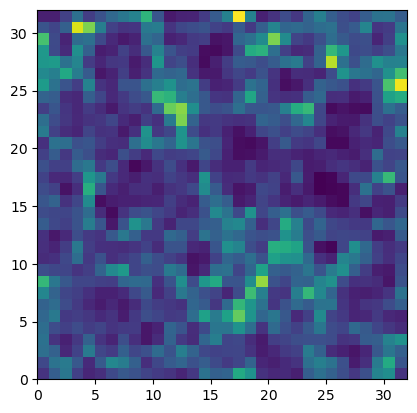

In [36]:
ini_name = 'ini_file.ini'
dirname = 'outdir/example0'
which_field = 'BORG_final_density'; MAS = 'CIC'
# which_field = 's_field'; MAS = 'None'

dens, L = analysis.get_mock_field(ini_name, dirname, which_field)
print(np.std(dens), np.mean(dens))

Pk = PKL.Pk(dens.astype(np.float32), L, axis=0, MAS=MAS, threads=1, verbose=True)
k      = Pk.k3D
Pk_true     = Pk.Pk[:,0]

plt.loglog(k, Pk_true)

plt.figure()
plt.pcolor(dens[dens.shape[0]//2])
plt.gca().set_aspect('equal')

Computing ensemble mean field


100%|██████████| 20/20 [00:00<00:00, 337.43it/s]


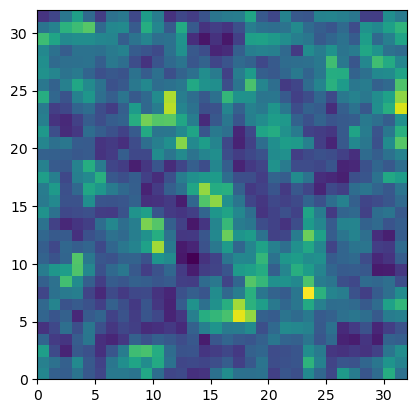

In [39]:
mcmc_steps = np.arange(20)
ini_name = 'ini_file.ini'
dirname = 'outdir/example0'

dens_mean, dens_std = analysis.compute_ensemble_mean_field(ini_name, dirname, mcmc_steps)
                                                  
plt.figure()
plt.pcolor(dens_mean[dens_mean.shape[0]//2])
plt.gca().set_aspect('equal')

BOXSIZE 500.0

Computing power spectrum of the field...
Time to complete loop = 0.00
Time taken = 0.00 seconds


100%|██████████| 20/20 [00:00<00:00, 212.48it/s]


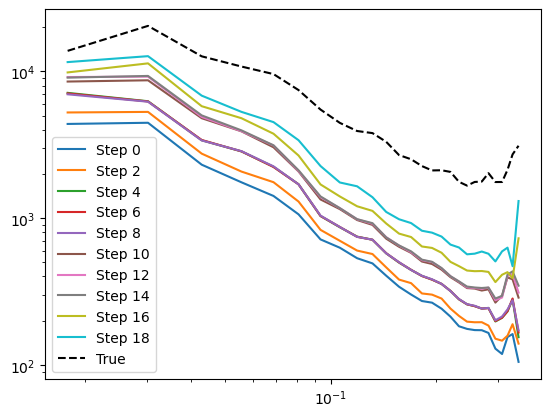

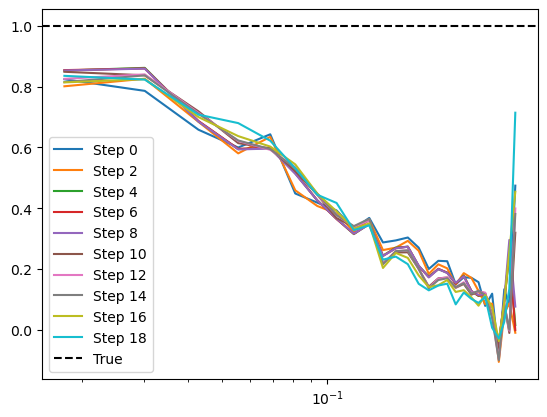

In [35]:
mcmc_steps = np.arange(20)
ini_name = 'ini_file.ini'
dirname = 'outdir/example0'
k, Pk_true, all_pk, all_r = analysis.get_spectra(ini_name, dirname, mcmc_steps)

# for i in range(len(all_pk)):
for i in range(0, 20, 2):
    plt.loglog(k, all_pk[i], label=f'Step {i}')
plt.loglog(k, Pk_true, ls='--', color='k', label='True')
plt.legend()

plt.figure()
for i in range(0, 20, 2):
    plt.semilogx(k, all_r[i], label=f'Step {i}')
plt.axhline(1, ls='--', color='k', label='True')
plt.legend()

In [11]:
dirname = 'outdir/example1'

all_fname = ['mock_data.h5', 'mcmc_0.h5', 'mcmc_20.h5', 'mcmc_79.h5']

for fname in all_fname:
    with h5.File(os.path.join(dirname, fname), 'r') as f:
        sfield = f['scalars/BORG_final_density'][:]
        print(fname, sfield.std())

mock_data.h5 0.521446084349996
mcmc_0.h5 0.05371104376346312
mcmc_20.h5 0.05765913633435571
mcmc_79.h5 0.06103314972961067
